[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chung\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\chung\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('like', 3671), ('feel', 3599), ('want', 2256), ('know', 2207), ('get', 2165), ('life', 2108), ('time', 1851), ('even', 1812), ('people', 1735), ('thing', 1516), ('really', 1463), ('friend', 1420), ('year', 1413), ('day', 1370), ('one', 1353), ('would', 1290), ('depression', 1222), ('make', 1163), ('much', 1161), ('think', 1153)]
another moment let someone love know want anymore trouble remembering hopeful 
 job without another go freaking job want thing even get bed tip even know loo
ight feel angry disgusted know wrong want google see picture feel like head fi
al friend nice probably creeped hate want hate brain feel like baby want mothe
 hate want hate brain feel like baby want mother know wrong therapy helping su
difference wake tomorrow cannot miss want hurt feel though would better dead s
 time heals sorrow say shit hurt bad want break life senior high school studen
e second sweet loving next one shout want die cry apologises handle long anymo
m providing 3 kid like proof provid

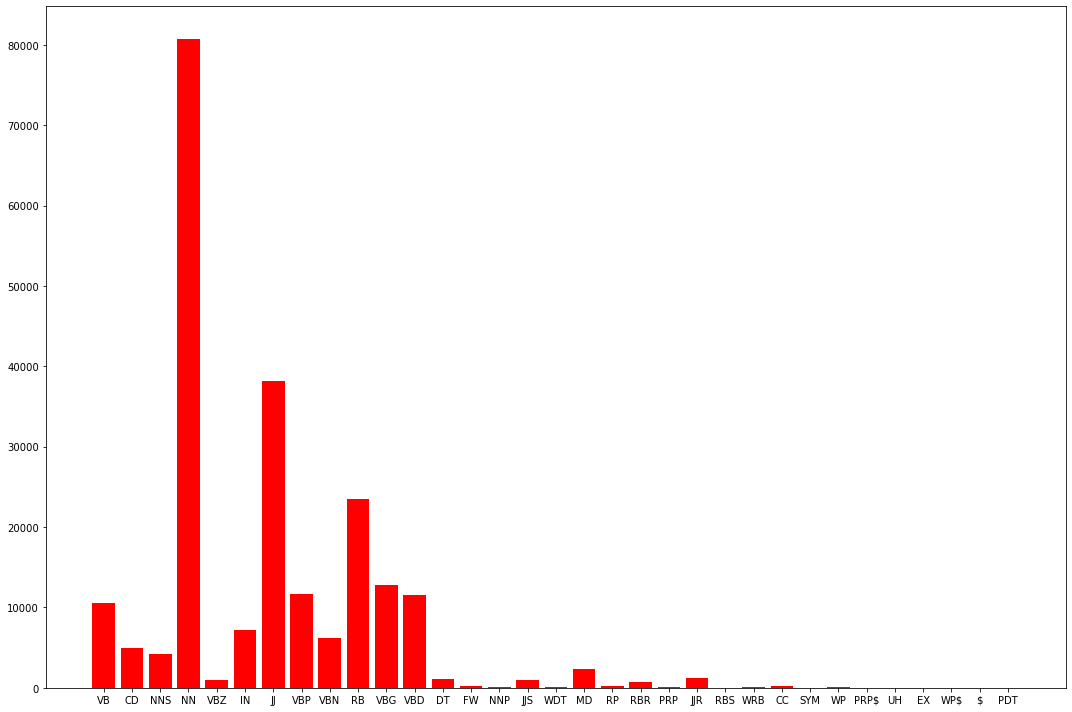

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
nltk.download('averaged_perceptron_tagger')
from nltk import FreqDist


df = pd.read_csv('r-dep data.csv')

df.fillna(value='')

tokenizer = RegexpTokenizer(r'\w+')
#had to add in .astype(str) because it would run into some float types and the .lower() will return an error
df['body'] = df['body'].astype(str).apply(lambda x: tokenizer.tokenize(x.lower()))


###remove stopwords###

#returns all words that aren't in the list of stopwords
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words
#had to use 'python -m nltk.downloader stopwords' from the TestEnv to make stopwords work
df['body'] = df['body'].apply(lambda x: remove_stopwords(x))


###lemmatizer -- lemmatizer maps common words back to its base###

lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(x) for x in text]
    return lem_text
df['body'] = df['body'].apply(lambda x: word_lemmatizer(x))


###storing title and body columns as a list to feed into pos_tag###
body_list = list(df['body'])


#Text classification: pos tagging
pos_tagged_body = []

for ele in body_list:
    pos_tagged_body.append(nltk.pos_tag(ele))

df['pos_tagged_body'] = pos_tagged_body



###The codes below analyzes text frequency distribution, collocation, and concordance while excluding certain words###
single_w = []
exclude_list = ['nan']
            
def exclude(text):
    words = [w for w in text if w not in exclude_list]
    return words
df['body'] = df['body'].apply(lambda x: exclude(x))
            
for item in df['pos_tagged_body']:
    for tuples in item:
        if tuples[0] not in exclude_list:
            single_w.append(tuples[0])
            
fd = nltk.FreqDist(single_w)
print(fd.most_common(20))


text = nltk.Text(single_w)
concordance_list = text.concordance_list("want", lines=20)
for entry in concordance_list:
    print(entry.line)
finder = nltk.collocations.QuadgramCollocationFinder.from_words(text)
print(finder)
print(finder.ngram_fd.most_common(20))


'''creating a dictionary to store counts of unique POS tags'''
pos_list = []
for row in df['pos_tagged_body']:
    for tup in row:
        if tup[1] not in pos_list:
            pos_list.append(tup[1])
            
pos_dict = {}
for item in pos_list:
    pos_dict[item] = 0
    for row in df['pos_tagged_body']:
        for tup in row:
            if tup[1] == item:
                pos_dict[item] += 1
                

'''Plotting the counts'''
%matplotlib inline

fig = plt.figure(figsize=(15,10))
plt.bar(pos_dict.keys(), pos_dict.values(), color='red')
plt.tight_layout()
plt.savefig("pos_dist.png", dpi=300)
plt.show()


df_new = pd.DataFrame({'text': df['body'],
                       'label': 0})

df_new.to_csv('r-dep data cleaned.csv', index=False)


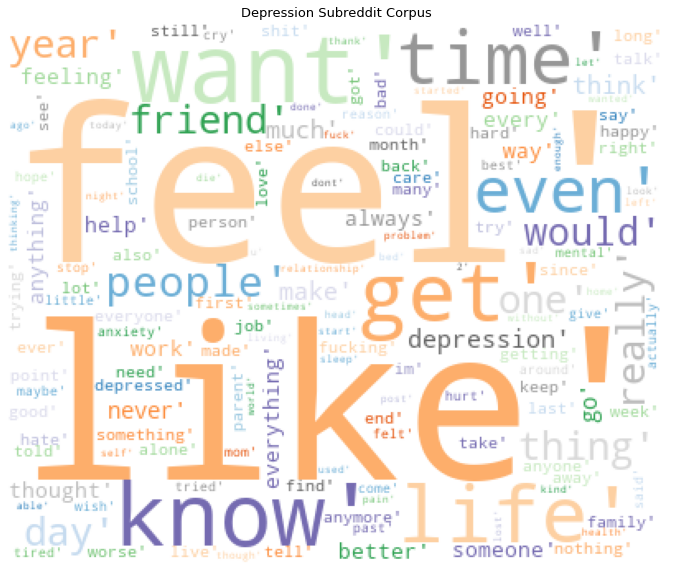

In [10]:
from wordcloud import WordCloud, ImageColorGenerator
'''defining method to generate a WordCloud'''
def generate_wordcloud(data, title):
    cloud = WordCloud(width=400,
                      height=330,
                      max_words=150,
                      colormap='tab20c',
                      stopwords=exclude_list,
                      collocations=False,
                      background_color='white'
                     ).generate_from_text(data)
    plt.figure(figsize=(14,10))
    plt.imshow(cloud)
    plt.axis('off')
    plt.title(title, fontsize=13)
    plt.savefig("wordcloud.png", dpi=300)
    plt.show()
    
generate_wordcloud(str(single_w), 'Depression Subreddit Corpus')

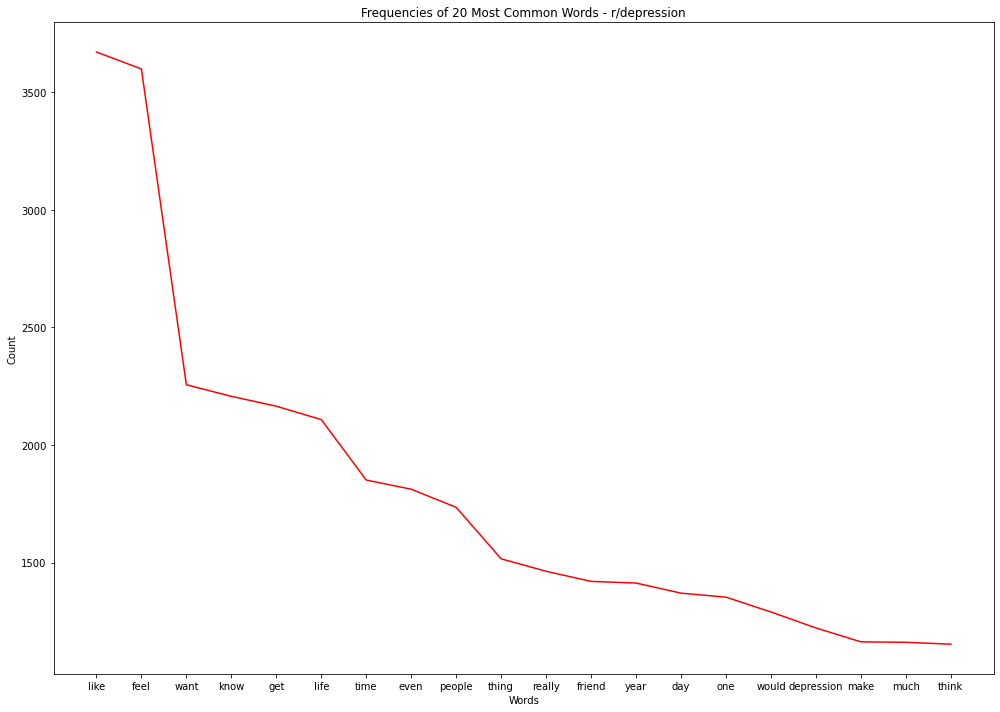

<Figure size 432x288 with 0 Axes>

In [30]:
top_20 = []
w_freq = fd.most_common(20)

freq_dist = dict(w_freq)
fig = plt.figure(figsize=(14,10))
plt.plot(freq_dist.keys(), freq_dist.values(), color='red')
plt.title("Frequencies of 20 Most Common Words - r/depression")
plt.xlabel("Words")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.savefig("subreddit.png", dpi=300)